In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
mydataset = {
  'cars': ["BMW", "Volvo", "Ford"],
  'passings': [3, 7, 2]
}

myvar = pd.DataFrame(mydataset)

print(myvar)

    cars  passings
0    BMW         3
1  Volvo         7
2   Ford         2


In [1004]:
# ml-100k
oo_info = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.info")
type(oo_info)




pandas.core.frame.DataFrame

### 1. Läs in användardata, ratingdata och filmdata

In [817]:

# filmData
oo_filmData = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.item",  sep="|", encoding="iso-8859-1",
names=["movie_id" ,"movie_title", "release_date" ,"video_release_date",
"IMDb_URL " , "unknown","Action ","Adventure","Animation",
"Children's","Comedy"," Crime","Documentary ","Drama","Fantasy",
"Film-Noir","Horror ","Musical","Mystery","Romance","Sci-Fi","Thriller",
"War ","Western"])
# oo[["City","Sport","Athlete"]]
oo_filmData.head(2)


,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [107]:
# userData 
oo_userData = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.user",  sep="|", encoding="iso-8859-1",
names=["user_id" ,"age", "gender" ,"occupation",
"zip_code"])
oo_userData.head(2)


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [108]:
print(oo_userData.describe())

          user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000


In [317]:
# ratingData
oo_ratingData = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.data",  sep="\s+", encoding="iso-8859-1",
names=["user_id","item_id","rating","timestamp"])
oo_ratingData

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [816]:
names=["movie_id" ,"movie_title", "release_date" ,"video_release_date",
"IMDb_URL " , "unknown","Action ","Adventure","Animation"
"Children's","Comedy"," Crime","Documentary ","Drama","Fantasy",
"Film-Noir","Horror ","Musical","Mystery","Romance","Sci-Fi","Thriller",
"War ","Western"]
len(names)

23

# 2. Välj data 

In [111]:
# Visa endast kolumnerna Kön, Ålder och Yrke av användarna
KAY =oo_userData[["gender","age","occupation"]]
print(KAY.head())




  gender  age  occupation
0      M   24  technician
1      F   53       other
2      M   23      writer
3      M   24  technician
4      F   33       other


In [865]:
# Sortera ratings enligt film. (Vi vill alltså se alla ratings för en film under varann)

SRF_one = oo_ratingData[(oo_ratingData.item_id == 1)]
print(SRF_one.head()) 
print("SRF_one sum: ",len(SRF_one) ,"\n")

SRF_all= oo_ratingData.sort_values(by=["item_id"])
print(SRF_all)
print("SRF_all sum: ",len(SRF_all))


      user_id  item_id  rating  timestamp
24        308        1       4  887736532
454       287        1       5  875334088
957       148        1       4  877019411
971       280        1       4  891700426
1324       66        1       3  883601324
SRF_one sum:  452 

       user_id  item_id  rating  timestamp
25741       84        1       2  883452108
93639      806        1       4  882385082
55726      768        1       5  883835025
49529       92        1       4  875810511
89079      419        1       4  879435590
...        ...      ...     ...        ...
75323      863     1678       1  889289570
67302      863     1679       3  889289491
80394      863     1680       2  889289570
92329      896     1681       3  887160722
95376      916     1682       3  880845755

[100000 rows x 4 columns]
SRF_all sum:  100000


# 3. Filtrera data


In [113]:
# Visa endast användare med ett visst yrke.
AMY = oo_userData[(oo_userData.occupation=="technician")]
print(AMY.head())


     user_id  age gender  occupation zip_code
0          1   24      M  technician    85711
3          4   24      M  technician    43537
43        44   26      M  technician    46260
76        77   30      M  technician    29379
142      143   42      M  technician    08832


In [133]:
#  Visa endast användare som är över 40 och män.
# oo[oo.Edition >= 1984 ]
AMA = oo_userData[(oo_userData.age > 40 ) & (oo_userData.gender  =="M") ]
print(AMA.head())


    user_id  age gender     occupation zip_code
5         6   42      M      executive    98101
6         7   57      M  administrator    91344
9        10   53      M         lawyer    90703
12       13   47      M       educator    29206
13       14   45      M      scientist    55106


# 4.  Utforska data 

In [327]:
# Visa medelåldern av användarna som är författare.
# print(VMAF.age.max(axis="index")) // 60
# print(VMAF.age.min(axis="index")) // 18
 
VMAF =  oo_userData[(oo_userData.occupation=="writer")]
# print(VMAF.head())
print("Avarge age :" , VMAF.age.mean(axis="index"))


Avarge age : 36.31111111111111


In [677]:
# Använd den tidigare ratings per film sorteringen för att räkna medelrating per film
RFS = oo_ratingData.groupby('item_id').agg({'rating':['mean']})

print(RFS.head())


           rating
             mean
item_id          
1        3.878319
2        3.206107
3        3.033333
4        3.550239
5        3.302326


In [676]:
# Hitta top 10 filmerna bland de som har fler än 40 ratings

Find_sorting= oo_ratingData.groupby("item_id").size()
Top_10_sorted =Find_sorting[Find_sorting.values>= 40].sort_values(ascending=False)
print("Each film item_id with his total rating sum: ")
print (Find_sorting.head())
print("\nThe top 10 movies among those with more than 40 ratings: ")
print(Top_10_sorted.head(10))

Each film item_id with his total rating sum: 
item_id
1    452
2    131
3     90
4    209
5     86
dtype: int64

The top 10 movies among those with more than 40 ratings: 
item_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
dtype: int64


# 5. Kombinera dataFrames

In [733]:
# Använd u.user datan för att undersöka vilka yrken som är vanliga bland män och viceversa?
KdF_userData_M  = oo_userData[(oo_userData.gender=="M")]
KdF_userData_F  = oo_userData[(oo_userData.gender=="F")]

KdF_userData_M_Sorting =  KdF_userData_M.groupby("occupation").size()
KdF_userData_F_Sorting =  KdF_userData_F.groupby("occupation").size()


Top_M_occupation = KdF_userData_M_Sorting[KdF_userData_M_Sorting.values>= 20].sort_values(ascending=False)
Top_F_occupation = KdF_userData_F_Sorting[KdF_userData_F_Sorting.values>= 20].sort_values(ascending=False)
print("Most occupations for men:\n",Top_M_occupation.head(),"\n")
print("Most occupations for women:\n",Top_F_occupation.head())



Most occupations for men:
 occupation
student       136
educator       69
other          69
engineer       65
programmer     60
dtype: int64 

Most occupations for women:
 occupation
student          60
administrator    36
other            36
librarian        29
educator         26
dtype: int64


In [830]:
# - Kombinera u.data med u.item för att  skapa en tabell där man kan se Movie Title och Rating.
film_Item = oo_filmData.sort_values("movie_title",ascending=True)[["movie_id","movie_title"]]
rating_Data = oo_ratingData

result_combination = pd.concat([rating_Data, film_Item], axis=1)
results_sorted = result_combination.sort_values("movie_id",ascending=True)[["movie_title","rating"]]

print(results_sorted.head())

         movie_title  rating
0   Toy Story (1995)       3
1   GoldenEye (1995)       3
2  Four Rooms (1995)       1
3  Get Shorty (1995)       2
4     Copycat (1995)       1


In [859]:
# Kombinera sedan den datan med datan från användartabellen (u.user) för att visafilmtitel, rating och information om användaren som gett den ratingen. Ordna datanenligt användar id (Vem har sett vilken film?)
userData_5= oo_userData
user_result_combination = pd.concat([userData_5,results_sorted], axis=1)
print(user_result_combination.head())


   user_id   age gender  occupation zip_code        movie_title  rating
0      1.0  24.0      M  technician    85711   Toy Story (1995)       3
1      2.0  53.0      F       other    94043   GoldenEye (1995)       3
2      3.0  23.0      M      writer    32067  Four Rooms (1995)       1
3      4.0  24.0      M  technician    43537  Get Shorty (1995)       2
4      5.0  33.0      F       other    15213     Copycat (1995)       1


In [1216]:
# - Vilka 5 användare är de snällaste och vilka 5 användare är de tuffaste? (Slå ihop varjeanvändares filmratings till ett medeltal)
ratingData_sortyed_by_id= oo_ratingData.sort_values(by=["user_id"])
SRF_all_54 =ratingData_sortyed_by_id.groupby('user_id').agg({'rating' : 'mean'})
df2=SRF_all_54.groupby(['rating']).apply(lambda x: x.sort_values(['rating'], ascending=False).head(2)
.drop('rating', axis=1))

# 5 användare är de tuffaste
df2.head(5)



,
rating,user_id
1.491954,181
1.834464,405
1.985185,445
2.050000,685
2.058036,774


In [1217]:
# 5 användare är de snällaste
df2.tail(5)

,
rating,user_id
4.687500,928
4.703704,628
4.724138,507
4.833333,688
4.869565,849


In [1219]:
import seaborn as sns


<AxesSubplot:xlabel='count', ylabel='occupation'>

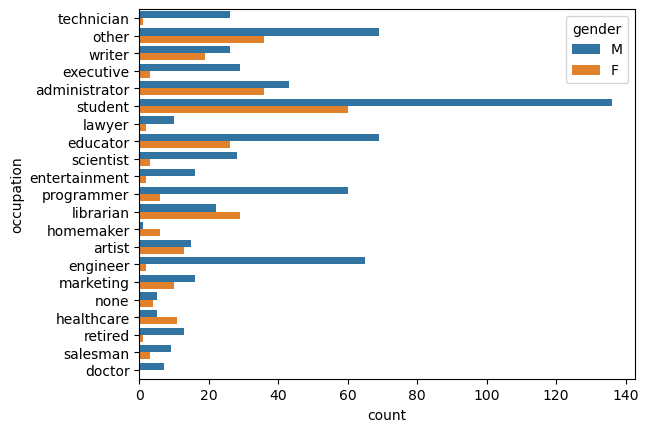

In [1244]:
# ifall du hittar nåt intressant som de har gemensamt?
# tycker att det är intressant att finna vart jobber man vs kvinnor i yrker
#  här den graffen visar väm jobber vart
sns.countplot(y='occupation' , data=oo_userData, hue='gender')

<AxesSubplot:xlabel='rating', ylabel='count'>

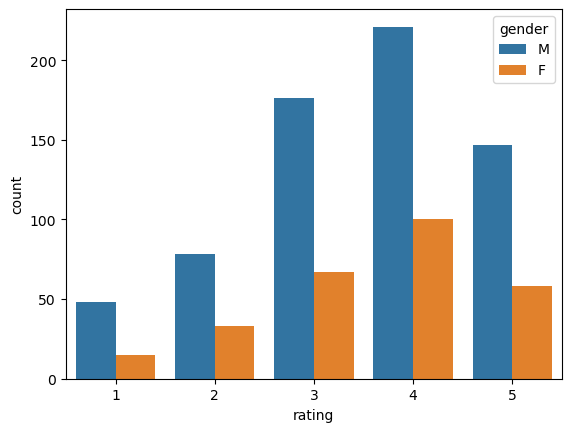

In [1255]:
# här kan vi se vem som har sett mest rating i olike grader
sns.countplot(x='rating' , data=user_result_combination, hue='gender')